In [ ]:
# Import the packages needed
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import math
import io

In [ ]:
!wget https://s3-eu-west-1.amazonaws.com/pstorage-leicester-213265548798/23581310/MyocardialinfarctioncomplicationsDatabase.csv


--2024-05-15 12:33:36--  https://s3-eu-west-1.amazonaws.com/pstorage-leicester-213265548798/23581310/MyocardialinfarctioncomplicationsDatabase.csv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.44.40, 52.218.57.3, 52.92.32.104, ...
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.44.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 437563 (427K) [text/csv]
Saving to: ‘MyocardialinfarctioncomplicationsDatabase.csv.1’

Myocardialinfarctio 100%[===================>] 427.31K  1.09MB/s    in 0.4s    

2024-05-15 12:33:37 (1.09 MB/s) - ‘MyocardialinfarctioncomplicationsDatabase.csv.1’ saved [437563/437563]



In [ ]:
df = pd.read_csv('MyocardialinfarctioncomplicationsDatabase.csv')

# **1. Remove features with significant missingness (>25%)**

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'index': range(1, len(df.columns)+1),
                                'column_name': df.columns,
                                 'percent_missing': percent_missing})
original_columns = df.columns.copy()
print("Total percent of missing values:", df.isnull().sum().sum()/len(df))

Total percent of missing values: 9.396470588235294


In [ ]:
# Removing features with more than 25 percent missing values
df2 = df.copy()
print("Number of columns originally:", len(df2.columns))
percent_missing = df2.isnull().sum() * 100 / len(df2)
new = []
for i in range(len(df.columns)):
    if percent_missing[i] > 25:
        new.append(i)

df2.drop(df2.columns[new], axis=1, inplace=True)
print("Number of columns after cleaning:", len(df2.columns))
print("Total percent of missing values:", df2.isnull().sum().sum()/len(df2))
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df2 = pd.DataFrame({'index': range(1, len(df2.columns)+1),
                                'column_name': df2.columns,
                                 'percent_missing': percent_missing})
print("Features excluded are: \n", original_columns[new])

Number of columns originally: 124
Number of columns after cleaning: 117
Total percent of missing values: 4.987058823529412
Features excluded are: 
 Index(['IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'KFK_BLOOD', 'NA_KB',
       'NOT_NA_KB', 'LID_KB'],
      dtype='object')


# **2. Feature selection**

In [ ]:
# Import packages needed to run this section of the notebook
!pip install probatus
!pip install lightgbm

from probatus.feature_elimination import ShapRFECV, EarlyStoppingShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm

In [ ]:
df2.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
feature_names = df2.columns[1:105].tolist()
predictions = df2.iloc[:, 105:]
y = np.array(predictions)
X = np.array(df2.iloc[:, 1:105])

label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
label6 = []
label7 = []
label8 = []
label9 = []
label10 = []
label11 = []
label12 = []

labels = [label1, label2, label3, label4, label5, label6, label7, label8, label9, label10, label11, label12]
print(feature_names)

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter

In [ ]:
df2.iloc[:, 105:].isnull().sum()

FIBR_PREDS    0
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
dtype: int64

In [ ]:
# Handles categorical and missing values
clf = lightgbm.LGBMClassifier(n_estimators=200, max_depth=3)

# Indices of columns to remove for each label due to leakiness
indices = [[36, 46, 55, 56], [37, 49, 57], [38, 49, 58], [39, 59], [64], [34], [], [], [], [40, 41, 42, 43, 44], [], []]

shap_elimination = {}
report = {}

for i in range(y.shape[1]-1):
        shap_elimination[i] = EarlyStoppingShapRFECV(clf, step=0.1, scoring='roc_auc', eval_metric='auc', early_stopping_rounds=5)
        Xf = np.delete(X, indices[i], axis=1)
        report[i] = shap_elimination[i].fit_compute(Xf, y[:,i], check_additivity=False)
        #print('Done')

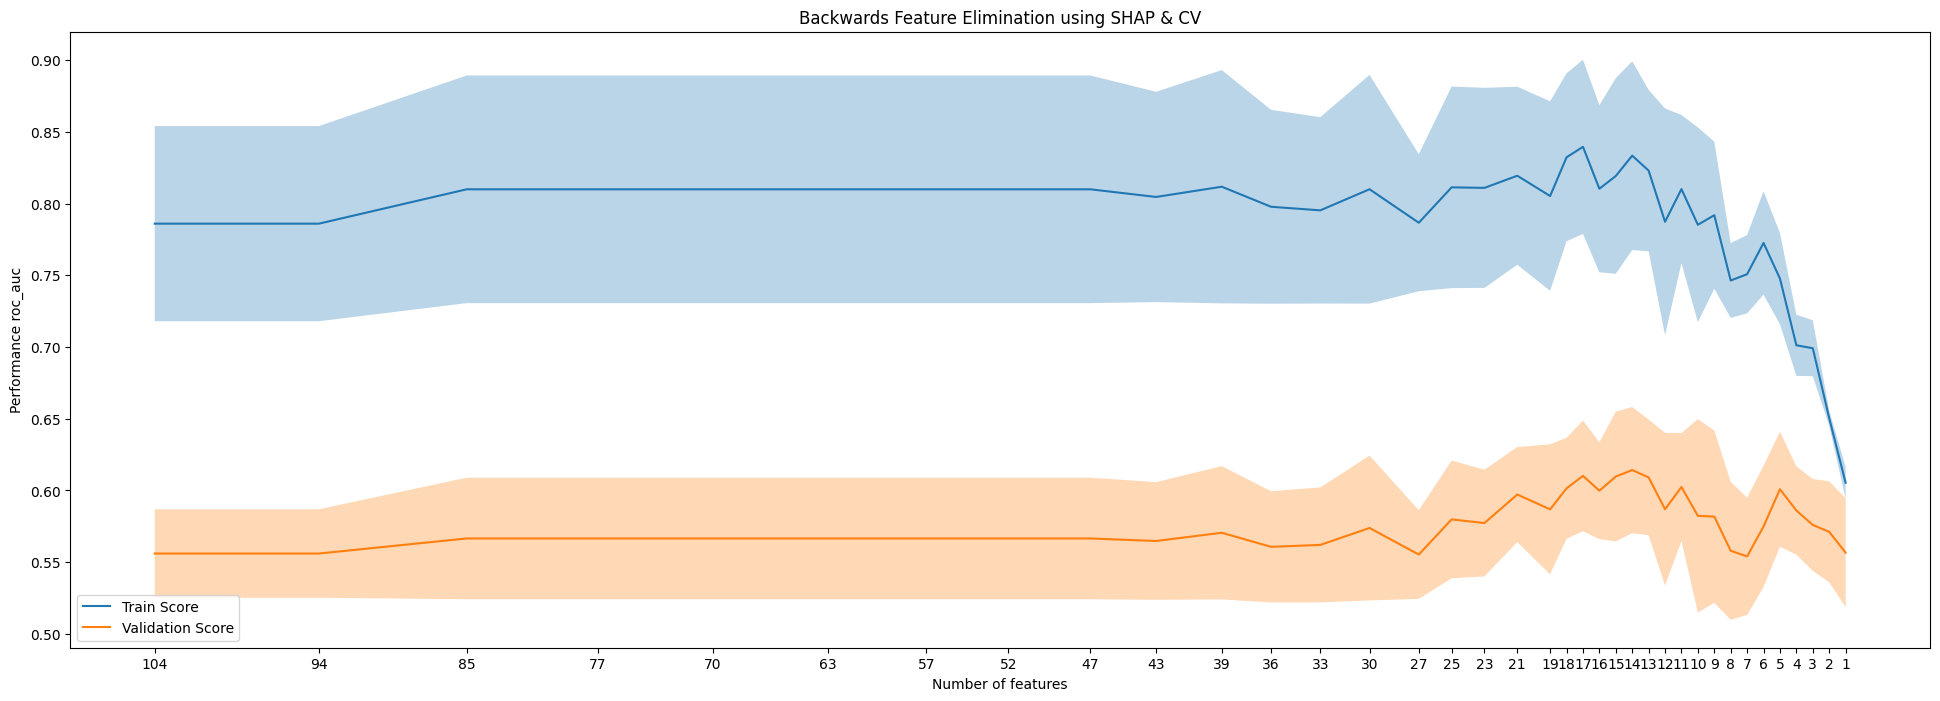

In [ ]:
# Make plots
performance_plot = shap_elimination[10].plot(figsize=(24, 8), show=True)

# Get final feature set
final_features_set = shap_elimination[1].get_reduced_features_set(num_features=22)

In [ ]:
print([feature_names[i] for i in final_features_set])

# Get the most impactful features for all
final_features_set0 = shap_elimination[0].get_reduced_features_set(num_features=16)
final_features_set1 = shap_elimination[1].get_reduced_features_set(num_features=17)
final_features_set2 = shap_elimination[2].get_reduced_features_set(num_features=8)
final_features_set3 = shap_elimination[3].get_reduced_features_set(num_features=18)
final_features_set4 = shap_elimination[4].get_reduced_features_set(num_features=14)
final_features_set5 = shap_elimination[5].get_reduced_features_set(num_features=14)
final_features_set6 = shap_elimination[6].get_reduced_features_set(num_features=7)
final_features_set7 = shap_elimination[7].get_reduced_features_set(num_features=7)
final_features_set8 = shap_elimination[8].get_reduced_features_set(num_features=19)
final_features_set9 = shap_elimination[9].get_reduced_features_set(num_features=7)
final_features_set10 = shap_elimination[10].get_reduced_features_set(num_features=9)

final_features_set = []
final_features_set.extend(final_features_set0)
final_features_set.extend(final_features_set1)
final_features_set.extend(final_features_set2)
final_features_set.extend(final_features_set3)
final_features_set.extend(final_features_set4)
final_features_set.extend(final_features_set5)
final_features_set.extend(final_features_set6)
final_features_set.extend(final_features_set7)
final_features_set.extend(final_features_set8)
final_features_set.extend(final_features_set9)
final_features_set.extend(final_features_set10)

features = [feature_names[i] for i in final_features_set]
print(features)


['AGE', 'SIM_GIPERT', 'DLIT_AG', 'nr_11', 'nr_03', 'nr_04', 'np_07', 'endocr_01', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'inf_im', 'n_r_ecg_p_08', 'fibr_ter_07', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'R_AB_2_n', 'NA_R_2_n']
['AGE', 'SEX', 'IBS_POST', 'DLIT_AG', 'nr_11', 'nr_03', 'S_AD_ORIT', 'D_AD_ORIT', 'FIB_G_POST', 'ant_im', 'fibr_ter_06', 'GIPO_K', 'GIPER_NA', 'NA_BLOOD', 'R_AB_1_n', 'NA_R_3_n', 'AGE', 'SIM_GIPERT', 'nr_11', 'endocr_01', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'inf_im', 'n_r_ecg_p_08', 'fibr_ter_07', 'GIPO_K', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'R_AB_2_n', 'NA_R_2_n', 'zab_leg_02', 'n_p_ecg_p_12', 'fibr_ter_07', 'GIPO_K', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'NOT_NA_1_n', 'AGE', 'FK_STENOK', 'S_AD_ORIT', 'n_p_ecg_p_10', 'fibr_ter_01', 'fibr_ter_08', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'TIME_B_S', 'R_AB_2_n', 'R_AB_3_n', 'NITR_S', 'NOT_NA_2_n', 'LID_S_n', 'AGE', 'STENOK_AN', 'S_AD_ORIT', 

In [ ]:
values, counts = np.unique(features, return_counts=True)
print("Number of features:", len(values))
labels_histogram = dict(zip(values, counts))
labels_histogram = dict(sorted(labels_histogram.items(), key=lambda x:x[1]))
print("Overall for all labels:")
for item in labels_histogram:
     print (item, labels_histogram[item])

Number of features: 54
Overall for all labels:
B_BLOK_S_n 1
FIB_G_POST 1
IM_PG_P 1
INF_ANAM 1
NA_R_1_n 1
NOT_NA_1_n 1
NOT_NA_2_n 1
O_L_POST 1
SEX 1
SIM_GIPERT 1
fibr_ter_01 1
fibr_ter_03 1
fibr_ter_06 1
fibr_ter_08 1
n_p_ecg_p_10 1
n_p_ecg_p_11 1
n_p_ecg_p_12 1
n_r_ecg_p_08 1
nr_03 1
ritm_ecg_p_02 1
ritm_ecg_p_06 1
zab_leg_01 1
zab_leg_02 1
GB 2
LID_S_n 2
NA_R_2_n 2
R_AB_1_n 2
R_AB_2_n 2
R_AB_3_n 2
ZSN_A 2
endocr_01 2
fibr_ter_07 2
inf_im 2
nr_11 2
DLIT_AG 3
FK_STENOK 3
GIPER_NA 3
GIPO_K 3
NA_R_3_n 3
NITR_S 3
ROE 3
TIME_B_S 3
lat_im 3
D_AD_ORIT 4
STENOK_AN 4
ant_im 4
IBS_POST 5
ALT_BLOOD 6
AST_BLOOD 6
K_BLOOD 6
NA_BLOOD 6
L_BLOOD 7
S_AD_ORIT 7
AGE 9


In [ ]:
# Features to use for imputation
print("Featues to use in subsequent analysis:", values.tolist())
label = df2.columns[105:].tolist()
all = values.tolist() + label

Featues to use in subsequent analysis: ['AGE', 'ALT_BLOOD', 'AST_BLOOD', 'B_BLOK_S_n', 'DLIT_AG', 'D_AD_ORIT', 'FIB_G_POST', 'FK_STENOK', 'GB', 'GIPER_NA', 'GIPO_K', 'IBS_POST', 'IM_PG_P', 'INF_ANAM', 'K_BLOOD', 'LID_S_n', 'L_BLOOD', 'NA_BLOOD', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NITR_S', 'NOT_NA_1_n', 'NOT_NA_2_n', 'O_L_POST', 'ROE', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'SEX', 'SIM_GIPERT', 'STENOK_AN', 'S_AD_ORIT', 'TIME_B_S', 'ZSN_A', 'ant_im', 'endocr_01', 'fibr_ter_01', 'fibr_ter_03', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'inf_im', 'lat_im', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'n_r_ecg_p_08', 'nr_03', 'nr_11', 'ritm_ecg_p_02', 'ritm_ecg_p_06', 'zab_leg_01', 'zab_leg_02']


In [ ]:
df3 = df2.loc[:, all]
df3 = df3.reset_index(drop=True)
df3.describe()

,AGE,ALT_BLOOD,AST_BLOOD,B_BLOK_S_n,DLIT_AG,D_AD_ORIT,FIB_G_POST,FK_STENOK,GB,GIPER_NA,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1692.000000,1416.000000,1415.000000,1689.000000,1452.000000,1433.000000,1688.000000,1627.000000,1691.000000,1325.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.856974,0.481455,0.263717,0.127294,3.340220,82.749477,0.008886,1.205286,1.393258,0.022642,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,11.259936,0.387261,0.201802,0.333401,3.098646,18.321063,0.093875,1.040814,1.088803,0.148814,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,26.000000,0.030000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.230000,0.150000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,0.380000,0.220000,0.000000,3.000000,80.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,0.610000,0.330000,0.000000,7.000000,90.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,3.000000,2.150000,1.000000,7.000000,190.000000,1.000000,4.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
# Export the dataset with selected features for further processing
df3.to_csv("Feature_selected.csv", index = False)

# **3. Data imputation**

In [ ]:
!pip install miceforest
import miceforest as mf
import math
!pip install autoimpute
from autoimpute.imputations import MultipleImputer

In [ ]:
df2 = pd.read_csv("Feature_selected.csv")
df2.head()

,AGE,ALT_BLOOD,AST_BLOOD,B_BLOK_S_n,DLIT_AG,D_AD_ORIT,FIB_G_POST,FK_STENOK,GB,GIPER_NA,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,NaN,NaN,0.0,7.0,100.0,0.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,0.38,0.18,0.0,0.0,90.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,0.30,0.11,1.0,2.0,100.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0.75,0.37,0.0,3.0,70.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,0.45,0.22,0.0,7.0,90.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#determine number missing value
missing_values = df2.isnull().sum()
print(f' total missing value before mean imputation: {sum(missing_values)}')

#after mean imputation, fill missing value with column mean
df2 = df2.fillna(df.mean())
#what we filled
print(df2)

#result
#determine number missing value
missing_values = df2.isnull().sum()
print(f' total missing value after mean imputation: {sum(missing_values)}')

 total missing value before mean imputation: 5403
       AGE  ALT_BLOOD  AST_BLOOD  B_BLOK_S_n  DLIT_AG  D_AD_ORIT  FIB_G_POST  \
0     77.0   0.481455   0.263717         0.0  7.00000      100.0         0.0   
1     55.0   0.380000   0.180000         0.0  0.00000       90.0         0.0   
2     52.0   0.300000   0.110000         1.0  2.00000      100.0         0.0   
3     68.0   0.750000   0.370000         0.0  3.00000       70.0         0.0   
4     60.0   0.450000   0.220000         0.0  7.00000       90.0         0.0   
...    ...        ...        ...         ...      ...        ...         ...   
1695  77.0   1.050000   0.520000         0.0  7.00000       70.0         0.0   
1696  70.0   0.481455   0.263717         0.0  7.00000        0.0         0.0   
1697  55.0   0.230000   0.150000         1.0  0.00000       50.0         0.0   
1698  79.0   0.450000   0.450000         0.0  7.00000       70.0         0.0   
1699  63.0   0.481455   0.263717         0.0  3.34022        0.0      

In [ ]:
df2.head()

,AGE,ALT_BLOOD,AST_BLOOD,B_BLOK_S_n,DLIT_AG,D_AD_ORIT,FIB_G_POST,FK_STENOK,GB,GIPER_NA,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,0.481455,0.263717,0.0,7.0,100.0,0.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,0.380000,0.180000,0.0,0.0,90.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,0.300000,0.110000,1.0,2.0,100.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0.750000,0.370000,0.0,3.0,70.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,0.450000,0.220000,0.0,7.0,90.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


###  (1) Multiple Imputation by Chained Equations (MICE)

In [ ]:
# Only impute with feature columns + labels and without ID
X = df2.copy()

# Create kernel
kernel = mf.MultipleImputedKernel(
  X,
  datasets=5,
  save_all_iterations=True)

# Run the MICE algorithm for 5 iterations on each of the datasets
kernel.mice(5)

AttributeError: module 'miceforest' has no attribute 'MultipleImputedKernel'

In [ ]:
# Multiple datasets are typically created so that some measure of confidence around each prediction can be created.
print(kernel)

              Class: MultipleImputedKernel
       Models Saved: Last Iteration
           Datasets: 5
         Iterations: 5
  Imputed Variables: 56
save_all_iterations: True


In [ ]:
dataset_1 = kernel.complete_data(0) # get the first imputed dataset

# the dataset now has no missing values
print("Total percent of missing values:", dataset_1.isnull().sum().sum()/len(dataset_1))

Total percent of missing values: 0.0


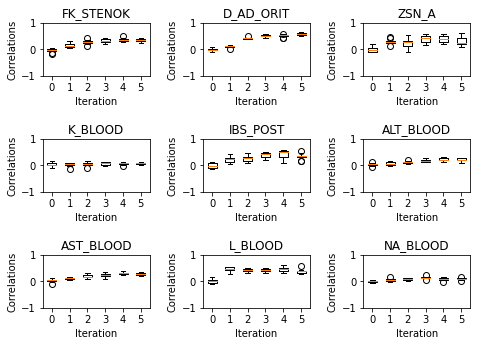

In [ ]:
# Check for convergence of imputed values
variables = ["FK_STENOK", "D_AD_ORIT", "ZSN_A", "K_BLOOD", "IBS_POST", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "NA_BLOOD"]
kernel.plot_correlations(variables=variables, left=0.001, right=0.99, bottom = 0.001, top = 0.99, wspace=0.5, hspace=1.2)

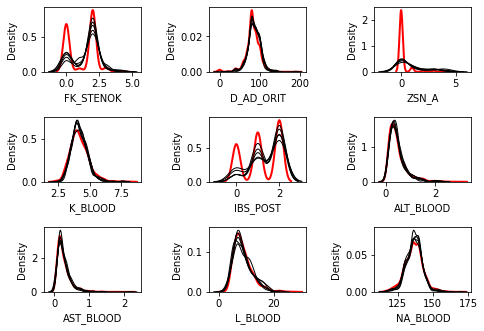

In [ ]:
# Plot distributions of imputed values, red are the original values
kernel.plot_imputed_distributions(variables=variables, left=0.001, right=0.99, bottom = 0.001, top = 0.99, wspace=0.7, hspace=0.7)

In [ ]:
dataset_1 = kernel.complete_data(0) # get the first imputed dataset
dataset_2 = kernel.complete_data(1) # get the second imputed dataset
dataset_3 = kernel.complete_data(2) # get the third imputed dataset
dataset_4 = kernel.complete_data(3) # get the fourth imputed dataset
dataset_5 = kernel.complete_data(4) # get the fifth imputed dataset

### (2) Predictive Mean Matching (PMM)

In [ ]:
# Now impute using mean matching (PMM)
kernelmeanmatch = mf.MultipleImputedKernel(X, mean_match_candidates=5)
kernelmeanmatch.mice(5)

In [ ]:
datasetPMM_1 = kernelmeanmatch.complete_data(0) # get the first PMM imputed dataset

# the dataset now has no missing values
print("Total percent of missing values:", datasetPMM_1.isnull().sum().sum()/len(datasetPMM_1))

Total percent of missing values: 0.0


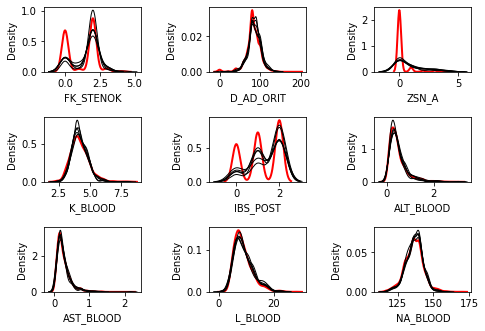

In [ ]:
# Plot distributions of imputed values, red are the original values
variables = ["FK_STENOK", "D_AD_ORIT", "ZSN_A", "K_BLOOD", "IBS_POST", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "NA_BLOOD"]
kernelmeanmatch.plot_imputed_distributions(variables=variables, left=0.001, right=0.99, bottom = 0.001, top = 0.99, wspace=0.7, hspace=0.7)

In [ ]:
datasetPMM_1 = kernelmeanmatch.complete_data(0) # get the first PMM imputed dataset
datasetPMM_2 = kernelmeanmatch.complete_data(1) # get the second PMM imputed dataset
datasetPMM_3 = kernelmeanmatch.complete_data(2) # get the third PMM imputed dataset
datasetPMM_4 = kernelmeanmatch.complete_data(3) # get the fourth PMM imputed dataset
datasetPMM_5 = kernelmeanmatch.complete_data(4) # get the fifth PMM imputed dataset

In [ ]:
datasets = [dataset_1, dataset_2, dataset_3, dataset_4, dataset_5, X, datasetPMM_1, datasetPMM_2, datasetPMM_3, datasetPMM_4, datasetPMM_5]
from scipy import stats

p_value = 0.05
p = np.zeros((len(datasets), len(X.columns)))
test = np.zeros((len(datasets), len(X.columns), 2))
means = np.zeros((len(datasets), len(X.columns)))
stdevs = np.zeros((len(datasets), len(X.columns)))
rejected = 0

def plot_original_and_imputed_data(df_original, df_imputed, col_1, col_2):
    missing=df_original[col_2].isnull()
    plt.scatter(df_original[col_1], df_original[col_2], color='gray')
    plt.scatter(df_imputed[col_1][missing], df_imputed[col_2][missing], color='royalblue')
    plt.xlabel(str(col_1))
    plt.ylabel(str(col_2))
    plt.show()

# Red is the original, black is the imputed data
def plot_original_and_imputed_density_9 (df_original, df_imputed, var):
    f, axes = plt.subplots(3, 3, figsize=(7, 7))
    count=0
    for i in range(3):
        for j in range(3):
            sns.kdeplot(df_original[var[count]], color="red", ax=axes[i, j])
            sns.kdeplot(df_imputed[var[count]], color="black", ax=axes[i, j])
            count+=1
    plt.tight_layout()

### (3) Mean/Mode

In [ ]:
OUTCOME = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK","OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS"]
FEATURES = list(set(list(df2.columns)).difference(set(OUTCOME)))

In [ ]:
df4=df2.loc[:, FEATURES]

# Do mean for numeric columns and mode for the rest
Column_Mean=['AGE','S_AD_ORIT','D_AD_ORIT','K_BLOOD','NA_BLOOD','ALT_BLOOD','AST_BLOOD',
             'L_BLOOD','ROE']
No_Need=['ID','SEX']
Column_Mode=set(list(df4.columns)).difference(set(Column_Mean)).difference(set(No_Need))

for (columnName, columnData) in df4.iteritems():
    if columnName in Column_Mean:
        mean=df4[columnName].mean()
        df4.fillna(value={columnName: mean}, inplace=True)
    if columnName in Column_Mode:
        mode=float(df4[columnName].mode())
        df4.fillna(value={columnName: mode}, inplace=True)

# the dataset now has no missing values
print("Total percent of missing values:", df4.isnull().sum().sum()/len(df4))

# Add labels back to df4
df4 = pd.concat([df4, df2[OUTCOME]], axis = 1)

Total percent of missing values: 0.0


### (4) Regression Imputation

In [ ]:
df5 = df2.loc[:, FEATURES]
# Correlation matrix showing how the features are related to each other
corr=df5.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,MP_TP_POST,NOT_NA_2_n,ritm_ecg_p_04,n_r_ecg_p_01,ritm_ecg_p_06,nr_11,NA_BLOOD,L_BLOOD,zab_leg_02,AST_BLOOD,O_L_POST,ritm_ecg_p_02,AGE,S_AD_ORIT,NITR_S,K_BLOOD,B_BLOK_S_n,IBS_POST,ROE,GIPO_K,R_AB_1_n,fibr_ter_07,NA_R_1_n,SEX,ZSN_A,FK_STENOK,GIPER_NA,STENOK_AN,n_p_ecg_p_12,fibr_ter_08,fibr_ter_01,NA_R_2_n,lat_im,ant_im,n_r_ecg_p_09,ritm_ecg_p_07,R_AB_2_n,R_AB_3_n,DLIT_AG,n_r_ecg_p_08,NOT_NA_1_n,ALT_BLOOD,inf_im,INF_ANAM,n_p_ecg_p_11,n_r_ecg_p_10,zab_leg_01,FIB_G_POST,GB,D_AD_ORIT,NA_R_3_n,TIME_B_S,post_im,SIM_GIPERT,endocr_01,nr_03,LID_S_n
MP_TP_POST,1.00,-0.00,-0.03,-0.03,-0.01,0.10,-0.02,0.04,0.06,0.05,0.04,0.85,0.13,-0.05,0.07,-0.04,-0.03,-0.03,0.00,0.01,0.02,-0.02,0.03,-0.08,0.14,0.04,-0.02,0.04,0.02,-0.01,0.00,-0.00,-0.04,-0.02,-0.01,-0.08,0.01,-0.01,0.05,-0.01,-0.01,0.05,0.07,-0.01,0.00,0.06,-0.02,0.10,0.05,-0.05,0.01,-0.02,-0.01,-0.02,-0.00,0.18,0.02
NOT_NA_2_n,-0.00,1.00,0.02,-0.02,-0.01,-0.02,-0.02,-0.00,0.02,0.04,0.01,-0.03,0.00,-0.02,0.04,-0.03,0.05,0.02,-0.00,0.02,0.19,0.01,0.07,-0.03,0.00,0.02,-0.02,0.02,0.04,-0.01,0.01,0.21,0.06,0.07,-0.01,0.05,0.37,0.12,0.03,-0.01,0.32,0.03,-0.02,0.03,-0.04,0.03,0.04,0.03,0.04,-0.01,0.11,-0.05,0.02,-0.02,0.04,0.05,0.01
ritm_ecg_p_04,-0.03,0.02,1.00,-0.02,-0.00,0.02,-0.00,0.00,0.07,0.03,0.06,-0.03,0.03,-0.14,0.02,0.03,-0.03,-0.00,0.01,0.01,-0.00,-0.01,-0.01,0.04,-0.04,0.02,-0.02,0.02,-0.00,-0.00,-0.01,0.04,-0.06,-0.06,-0.00,-0.07,0.03,0.02,-0.03,0.12,-0.02,-0.02,0.12,0.00,-0.02,-0.00,0.05,-0.01,-0.01,-0.17,0.00,-0.05,-0.01,0.01,0.01,-0.02,-0.03
n_r_ecg_p_01,-0.03,-0.02,-0.02,1.00,-0.00,0.01,0.02,0.02,-0.00,-0.04,-0.02,-0.03,0.10,0.04,-0.01,0.03,-0.05,-0.03,-0.03,-0.01,0.01,-0.01,-0.00,0.00,-0.02,-0.01,-0.00,0.02,0.02,-0.01,-0.02,-0.01,-0.06,-0.06,-0.01,0.03,-0.02,-0.00,0.03,-0.01,-0.01,-0.05,0.10,-0.01,-0.03,-0.01,0.06,-0.02,0.02,0.05,0.03,-0.00,0.07,-0.02,-0.03,-0.03,-0.03
ritm_ecg_p_06,-0.01,-0.01,-0.00,-0.00,1.00,-0.00,nan,0.10,-0.01,-0.02,-0.01,-0.01,-0.01,nan,0.07,nan,-0.01,-0.01,-0.02,nan,-0.01,-0.00,0.02,-0.03,0.03,0.02,nan,0.04,-0.01,-0.00,-0.00,-0.01,-0.02,-0.02,-0.00,-0.01,-0.01,-0.01,0.03,-0.00,0.03,-0.00,0.05,-0.02,-0.00,-0.00,-0.01,-0.00,0.01,nan,-0.01,-0.02,-0.01,-0.00,0.06,-0.00,-0.02
nr_11,0.10,-0.02,0.02,0.01,-0.00,1.00,0.01,-0.04,0.00,-0.02,-0.01,0.06,0.04,0.01,-0.03,0.00,0.01,0.03,-0.03,-0.02,-0.04,-0.01,-0.06,0.01,0.04,0.09,-0.02,0.08,0.00,-0.01,-0.01,0.05,-0.03,-0.03,-0.01,-0.01,0.01,-0.03,0.01,0.15,-0.02,-0.06,-0.02,0.05,-0.02,-0.01,-0.01,-0.01,0.01,-0.00,-0.01,0.02,-0.03,0.03,-0.02,-0.02,0.02
NA_BLOOD,-0.02,-0.02,-0.00,0.02,nan,0.01,1.00,0.02,-0.05,-0.02,-0.07,-0.01,0.03,0.04,-0.07,0.30,-0.02,0.04,-0.01,-0.30,-0.06,-0.02,-0.09,-0.06,-0.02,-0.03,0.41,-0.01,-0.06,0.01,0.02,-0.02,-0.01,-0.03,-0.02,-0.06,0.01,-0.01,0.02,0.04,-0.02,-0.01,-0.04,0.01,0.04,0.04,-0.02,-0.02,0.01,0.02,-0.03,0.06,0.01,0.06,0.02,-0.01,-0.15
L_BLOOD,0.04,-0.00,0.00,0.02,0.10,-0.04,0.02,1.00,0.05,0.08,0.12,0.06,0.00,-0.14,0.10,0.01,-0.06,-0.10,0.01,-0.02,0.02,0.04,0.12,0.02,0.06,-0.03,0.02,-0.03,0.06,-0.01,0.06,0.05,0.08,0.09,0.03,0.08,0.05,0.01,0.00,0.01,0.02,0.04,0.04,-0.03,-0.00,0.01,0.01,0.05,-0.02,-0.16,0.03,-0.11,0.05,0.00,-0.00,-0.01,0.06
zab_leg_02,0.06,0.02,0.07,-0.00,-0.01,0.00,-0.05,0.05,1.00,-0.01,0.06,0.04,0.09,-0.11,0.07,0.03,-0.04,0.03,0.01,-0.03,0.01,-0.02,0.07,0.02,0.05,0.07,-0.02,0.08,0.02,0.06,0.00,0.07,0.01,0.01,-0.01,0.04,0.06,0.05,-0.01,-0.01,-0.02,0.01,0.01,0.03,0.00,-0.01,-0.08,0.02,-0.04,-0.13,0.08,-0.05,0.01,-0.03,-0.03,0.01,0.06
AST_BLOOD,0.05,0.04,0.03,-0.04,-0.02,-0.02,-0.02,0.08,-0.01,1.00,0.02,0.04,-0.05,-0.10,-0.01,0.05,0.06,-0.05,-0.03,-0.01,-0.03,0.02,0.01,0.05,0.00,-0.05,0.00,-0.06,0.06,-0.02,-0.00,0.00,0.10,0.08,-0.00,0.05,-0.02,0.02,-0.06,-0.02,0.00,0.52,0.02,-0.05,0.00,0.07,-0.01,0.01,-0.05,-0.08,0.04,0.06,0.01,-0.04,0.01,0.05,-0.01


In [ ]:
# Lists of data column names for the creation of subsets
Numerical=['AGE','S_AD_ORIT','D_AD_ORIT','K_BLOOD','NA_BLOOD','ALT_BLOOD','AST_BLOOD','L_BLOOD','ROE']
No_Need=['SEX']
Ordinal=['INF_ANAM','STENOK_AN','FK_STENOK','IBS_POST','GB','DLIT_AG','ZSN_A','ant_im',
         'lat_im','inf_im','post_im','TIME_B_S','R_AB_1_n','NA_R_1_n','NOT_NA_1_n',
         'R_AB_2_n','NA_R_2_n','NOT_NA_2_n','R_AB_3_n','NA_R_3_n'] #,'NOT_NA_3_n'

Binary=list(set(list(df5.columns)).difference(set(Numerical)).difference(set(No_Need)).difference(set(Ordinal)))
print(len(Binary))

27


In [ ]:
# Create data subsets for data imputaion of different data types
test_nu = df5[Numerical]
test_or = df5[Ordinal]
test_bi = df5[Binary]

# Data distribution in binary features
test_bi.apply(pd.Series.value_counts)

,n_r_ecg_p_09,MP_TP_POST,ritm_ecg_p_04,ritm_ecg_p_07,ritm_ecg_p_06,n_r_ecg_p_01,nr_11,n_r_ecg_p_08,zab_leg_02,O_L_POST,...,FIB_G_POST,fibr_ter_07,GIPER_NA,n_p_ecg_p_12,fibr_ter_08,fibr_ter_01,SIM_GIPERT,endocr_01,nr_03,LID_S_n
0.0,1583,1572,1525,1195,1547,1527,1637,1581,1572,1578,...,1673,1684,1295,1507,1688,1677,1635,1461,1644,1211
1.0,2,114,23,353,1,58,42,4,121,110,...,15,6,30,78,2,13,57,228,35,479


In [ ]:
# Make 1/7 of NaN 1 because of the sheer class imbalance for some features preventing logistic regression
import warnings
warnings.filterwarnings("ignore")
for i in Binary:
    test_bi[i] = test_bi[i].fillna(1, limit = math.ceil((1/7)*test_bi[i].isna().sum()))

test_bi.apply(pd.Series.value_counts)

,n_r_ecg_p_09,MP_TP_POST,ritm_ecg_p_04,ritm_ecg_p_07,ritm_ecg_p_06,n_r_ecg_p_01,nr_11,n_r_ecg_p_08,zab_leg_02,O_L_POST,...,FIB_G_POST,fibr_ter_07,GIPER_NA,n_p_ecg_p_12,fibr_ter_08,fibr_ter_01,SIM_GIPERT,endocr_01,nr_03,LID_S_n
0.0,1583,1572,1525,1195,1547,1527,1637,1581,1572,1578,...,1673,1684,1295,1507,1688,1677,1635,1461,1644,1211
1.0,19,116,45,375,23,75,45,21,122,112,...,17,8,84,95,4,15,59,230,38,481


In [ ]:
# Data imputation for binary features
BI = MultipleImputer(n=5, strategy="binary logistic", return_list=True).fit_transform(test_bi)
df_BI = pd.DataFrame(BI)
df_BI1 = pd.DataFrame(BI[0][1])
df_BI2 = pd.DataFrame(BI[1][1])
df_BI3 = pd.DataFrame(BI[2][1])
df_BI4 = pd.DataFrame(BI[3][1])
df_BI5 = pd.DataFrame(BI[4][1])

# Data imputation for numeric features
ST = MultipleImputer(n=5, strategy='stochastic',return_list=True).fit_transform(test_nu)
df_ST = pd.DataFrame(ST)
df_ST1 = pd.DataFrame(ST[0][1])
df_ST2 = pd.DataFrame(ST[1][1])
df_ST3 = pd.DataFrame(ST[2][1])
df_ST4 = pd.DataFrame(ST[3][1])
df_ST5 = pd.DataFrame(ST[4][1])

In [ ]:
# Data imputation for ordinal features
MU = MultipleImputer(n=5, strategy="multinomial logistic", return_list=True).fit_transform(test_or)
df_MU = pd.DataFrame(MU)
df_MU1 = pd.DataFrame(MU[0][1])
df_MU2 = pd.DataFrame(MU[1][1])
df_MU3 = pd.DataFrame(MU[2][1])
df_MU4 = pd.DataFrame(MU[3][1])
df_MU5 = pd.DataFrame(MU[4][1])

In [ ]:
stoch_ft1 = pd.concat([df2['SEX'], df_BI1, df_MU1, df_ST1, df2[OUTCOME]], axis = 1)
stoch_ft2 = pd.concat([df2['SEX'], df2[OUTCOME], df_BI2, df_MU2, df_ST2], axis = 1)
stoch_ft3 = pd.concat([df2['SEX'], df2[OUTCOME], df_BI3, df_MU3, df_ST3], axis = 1)
stoch_ft4 = pd.concat([df2['SEX'], df2[OUTCOME], df_BI4, df_MU4, df_ST4], axis = 1)
stoch_ft5 = pd.concat([df2['SEX'], df2[OUTCOME], df_BI5, df_MU5, df_ST5], axis = 1)

### (5) K-Nearest Neighbour (KNN) Imputation

In [ ]:
### Define function for KNN imputation ####
# Refernece: https://gist.github.com/YohanObadia/b310793cd22a4427faaadd9c381a5850
# Reference: https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637

#del all

from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers

def weighted_hamming(data):
    """ Compute weighted hamming distance on categorical variables. For one variable, it is equal to 1 if
        the values between point A and point B are different, else it is equal the relative frequency of the
        distribution of the value across the variable. For multiple variables, the harmonic mean is computed
        up to a constant factor.
        @params:
            - data = a pandas data frame of categorical variables
        @returns:
            - distance_matrix = a distance matrix with pairwise distance for all attributes
    """
    categories_dist = []

    for category in data:
        X = pd.get_dummies(data[category])
        X_mean = X * X.mean()
        X_dot = X_mean.dot(X.transpose())
        X_np = np.asarray(X_dot.replace(0,1,inplace=False))
        categories_dist.append(X_np)
    categories_dist = np.array(categories_dist)
    distances = hmean(categories_dist, axis=0)
    return distances


def distance_matrix(data, numeric_distance = "euclidean", categorical_distance = "jaccard"):
    """ Compute the pairwise distance attribute by attribute in order to account for different variables type:
        - Continuous
        - Categorical
        For ordinal values, provide a numerical representation taking the order into account.
        Categorical variables are transformed into a set of binary ones.
        If both continuous and categorical distance are provided, a Gower-like distance is computed and the numeric
        variables are all normalized in the process.
        If there are missing values, the mean is computed for numerical attributes and the mode for categorical ones.

        Note: If weighted-hamming distance is chosen, the computation time increases a lot since it is not coded in C
        like other distance metrics provided by scipy.
        @params:
            - data                  = pandas dataframe to compute distances on.
            - numeric_distances     = the metric to apply to continuous attributes.
                                      "euclidean" and "cityblock" available.
                                      Default = "euclidean"
            - categorical_distances = the metric to apply to binary attributes.
                                      "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                      available. Default = "jaccard"
        @returns:
            - the distance matrix
    """
    possible_continuous_distances = ["euclidean", "cityblock"]
    possible_binary_distances = ["euclidean", "jaccard", "hamming", "weighted-hamming"]
    number_of_variables = data.shape[1]
    number_of_observations = data.shape[0]

    # Get the type of each attribute (Numeric or categorical)
    is_numeric = [all(isinstance(n, numbers.Number) for n in data.iloc[:, i]) for i, x in enumerate(data)]
    is_all_numeric = sum(is_numeric) == len(is_numeric)
    is_all_categorical = sum(is_numeric) == 0
    is_mixed_type = not is_all_categorical and not is_all_numeric

    # Check the content of the distances parameter
    if numeric_distance not in possible_continuous_distances:
        print ("The continuous distance " + numeric_distance + " is not supported.")
        return None
    elif categorical_distance not in possible_binary_distances:
        print ("The binary distance " + categorical_distance + " is not supported.")
        return None

    # Separate the data frame into categorical and numeric attributes and normalize numeric data
    if is_mixed_type:
        number_of_numeric_var = sum(is_numeric)
        number_of_categorical_var = number_of_variables - number_of_numeric_var
        data_numeric = data.iloc[:, is_numeric]
        data_numeric = (data_numeric - data_numeric.mean()) / (data_numeric.max() - data_numeric.min())
        data_categorical = data.iloc[:, [not x for x in is_numeric]]

    # Replace missing values with column mean for numeric values and mode for categorical ones. With the mode, it
    # triggers a warning: "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
    # but the value are properly replaced
    if is_mixed_type:
        data_numeric.fillna(data_numeric.mean(), inplace=True)
        for x in data_categorical:
            data_categorical[x].fillna(data_categorical[x].mode()[0], inplace=True)
    elif is_all_numeric:
        data.fillna(data.mean(), inplace=True)
    else:
        for x in data:
            data[x].fillna(data[x].mode()[0], inplace=True)

    # "Dummifies" categorical variables in place
    if not is_all_numeric and not (categorical_distance == 'hamming' or categorical_distance == 'weighted-hamming'):
        if is_mixed_type:
            data_categorical = pd.get_dummies(data_categorical)
        else:
            data = pd.get_dummies(data)
    elif not is_all_numeric and categorical_distance == 'hamming':
        if is_mixed_type:
            data_categorical = pd.DataFrame([pd.factorize(data_categorical[x])[0] for x in data_categorical]).transpose()
        else:
            data = pd.DataFrame([pd.factorize(data[x])[0] for x in data]).transpose()

    if is_all_numeric:
        result_matrix = cdist(data, data, metric=numeric_distance)
    elif is_all_categorical:
        if categorical_distance == "weighted-hamming":
            result_matrix = weighted_hamming(data)
        else:
            result_matrix = cdist(data, data, metric=categorical_distance)
    else:
        result_numeric = cdist(data_numeric, data_numeric, metric=numeric_distance)
        if categorical_distance == "weighted-hamming":
            result_categorical = weighted_hamming(data_categorical)
        else:
            result_categorical = cdist(data_categorical, data_categorical, metric=categorical_distance)
        result_matrix = np.array([[1.0*(result_numeric[i, j] * number_of_numeric_var + result_categorical[i, j] *
                               number_of_categorical_var) / number_of_variables for j in range(number_of_observations)] for i in range(number_of_observations)])

    # Fill the diagonal with NaN values
    np.fill_diagonal(result_matrix, np.nan)

    return pd.DataFrame(result_matrix)


def knn_impute(target, attributes, k_neighbors, aggregation_method="mean", numeric_distance="euclidean",
               categorical_distance="jaccard", missing_neighbors_threshold = 0.5):
    """ Replace the missing values within the target variable based on its k nearest neighbors identified with the
        attributes variables. If more than 50% of its neighbors are also missing values, the value is not modified and
        remains missing. If there is a problem in the parameters provided, returns None.
        If to many neighbors also have missing values, leave the missing value of interest unchanged.
        @params:
            - target                        = a vector of n values with missing values that you want to impute. The length has
                                              to be at least n = 3.
            - attributes                    = a data frame of attributes with n rows to match the target variable
            - k_neighbors                   = the number of neighbors to look at to impute the missing values. It has to be a
                                              value between 1 and n.
            - aggregation_method            = how to aggregate the values from the nearest neighbors (mean, median, mode)
                                              Default = "mean"
            - numeric_distances             = the metric to apply to continuous attributes.
                                              "euclidean" and "cityblock" available.
                                              Default = "euclidean"
            - categorical_distances         = the metric to apply to binary attributes.
                                              "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                              available. Default = "jaccard"
            - missing_neighbors_threshold   = minimum of neighbors among the k ones that are not also missing to infer
                                              the correct value. Default = 0.5
        @returns:
            target_completed        = the vector of target values with missing value replaced. If there is a problem
                                      in the parameters, return None
    """

    # Get useful variables
    possible_aggregation_method = ["mean", "median", "mode"]
    number_observations = len(target)
    is_target_numeric = all(isinstance(n, numbers.Number) for n in target)

    # Check for possible errors
    if number_observations < 3:
        print ("Not enough observations.")
        return None
    if attributes.shape[0] != number_observations:
        print ("The number of observations in the attributes variable is not matching the target variable length.")
        return None
    if k_neighbors > number_observations or k_neighbors < 1:
        print ("The range of the number of neighbors is incorrect.")
        return None
    if aggregation_method not in possible_aggregation_method:
        print ("The aggregation method is incorrect.")
        return None
    if not is_target_numeric and aggregation_method != "mode":
        print ("The only method allowed for categorical target variable is the mode.")
        return None

    # Make sure the data are in the right format
    target = pd.DataFrame(target)
    attributes = pd.DataFrame(attributes)

    # Get the distance matrix and check whether no error was triggered when computing it
    distances = distance_matrix(attributes, numeric_distance, categorical_distance)
    if distances is None:
        return None

    # Get the closest points and compute the correct aggregation method
    for i, value in enumerate(target.iloc[:, 0]):
        if pd.isnull(value):
            order = distances.iloc[i,:].values.argsort()[:k_neighbors]
            closest_to_target = target.iloc[order, :]
            missing_neighbors = [x for x  in closest_to_target.isnull().iloc[:, 0]]
            # Compute the right aggregation method if at least more than 50% of the closest neighbors are not missing
            if sum(missing_neighbors) >= missing_neighbors_threshold * k_neighbors:
                continue
            elif aggregation_method == "mean":
                target.iloc[i] = np.ma.mean(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            elif aggregation_method == "median":
                target.iloc[i] = np.ma.median(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            else:
                target.iloc[i] = stats.mode(closest_to_target, nan_policy='omit')[0][0]

    return target

In [ ]:
df6=df5.copy()

# Lists of data column names for the creation of data subsets
Numerical=['AGE','S_AD_ORIT','D_AD_ORIT','K_BLOOD','NA_BLOOD','ALT_BLOOD','AST_BLOOD','L_BLOOD','ROE']
No_Need=['SEX']
Ordinal=['INF_ANAM','STENOK_AN','FK_STENOK','IBS_POST','GB','DLIT_AG','ZSN_A','ant_im',
         'lat_im','inf_im','post_im','TIME_B_S','R_AB_1_n','NA_R_1_n','NOT_NA_1_n',
         'R_AB_2_n','NA_R_2_n','NOT_NA_2_n','R_AB_3_n','NA_R_3_n']
Binary=list(set(list(df6.columns)).difference(set(Numerical)).difference(set(No_Need)).difference(set(Ordinal)))

# Create data subsets for data imputaion of different data types
df_nu = df6[Numerical]
df_cat = df6[Ordinal+list(Binary)]

In [ ]:
# Create first dataframe for imputed data columns to be appended (column "SEX" + ordinal/binary columns)
DF_cat = df6[['SEX']]

# Impute columns of ordinal/binary values with mode and hamming distance
for (columnName, columnData) in df_cat.iteritems():
    new_df = knn_impute(target=df_cat[columnName], attributes=df_cat.drop([columnName], 1),
                                    aggregation_method="mode", k_neighbors=5, numeric_distance='euclidean', categorical_distance='hamming', missing_neighbors_threshold=1.1)
    DF_cat = pd.concat([DF_cat, new_df], axis=1)

# The dataset now has no missing values
print("Total percent of missing values:", DF_cat.isnull().sum().sum()/len(DF_cat))

Total percent of missing values: 0.0


In [ ]:
# Create second dataframe for imputed data columns to be appended (numeric columns)
DF_nu = pd.DataFrame()

# Impute columns of numeric values with mean and euclidean distance
for (columnName, columnData) in df_nu.iteritems():
    new_df = knn_impute(target=df_nu[columnName], attributes=df_nu.drop([columnName], 1),
                                    aggregation_method="mean", k_neighbors=5, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=1.1)
    DF_nu = pd.concat([DF_nu, new_df], axis=1)

# The dataset now has no missing values
print("Total percent of missing values:", DF_nu.isnull().sum().sum()/len(DF_nu))

Total percent of missing values: 0.0


In [ ]:
# Concatenate the two subsets
df_KNN = pd.concat([DF_cat, DF_nu, df2[OUTCOME]], axis=1)

### (6) Compare performances

In [ ]:
stoch_ft1.head()

,SEX,n_r_ecg_p_09,MP_TP_POST,ritm_ecg_p_04,ritm_ecg_p_07,ritm_ecg_p_06,n_r_ecg_p_01,nr_11,n_r_ecg_p_08,zab_leg_02,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
datasetkNN = df_KNN
datasetMM_1 = df4
datasetSTOCH1 = stoch_ft1
datasetSTOCH2 = stoch_ft2
datasetSTOCH3 = stoch_ft3
datasetSTOCH4 = stoch_ft4
datasetSTOCH5 = stoch_ft5

df2_new = df2

In [ ]:
datasetSTOCH1.columns[(datasetSTOCH1 < 0).any()].tolist()

In [ ]:
print(len(dataset_1.columns[dataset_1.isna().any()]))

0


In [ ]:
print(dataset_1.shape)
print(datasetPMM_1.shape)
print(datasetMM_1.shape)
print(datasetSTOCH1.shape)
print(datasetkNN.shape)

(1700, 69)
(1700, 69)
(1700, 69)
(1700, 69)
(1700, 69)


In [ ]:
# Conditions to check
col = dataset_1.columns

datasets = [dataset_1, dataset_2, dataset_3, dataset_4, dataset_5, datasetPMM_1, datasetPMM_2, datasetPMM_3, datasetPMM_4, datasetPMM_5, datasetMM_1, datasetSTOCH1, datasetSTOCH2, datasetSTOCH3, datasetSTOCH4, datasetSTOCH5, datasetkNN]
mse = np.zeros((len(datasets), len(col)))

for i in range(len(datasets)):
    j = 0
    for columns in col:
      if columns == 'ID':
        continue
      else:
        dfclean = df2_new.fillna(df2_new.mean())
        realVals = dfclean[columns]
        predictedVals = datasets[i][columns]
        mse[i, j] = mean_squared_error(realVals, predictedVals, squared=False)/(math.sqrt(dfclean[columns].max()-dfclean[columns].min()))
        j += 1

In [ ]:
# Mean of NRMSE for each dataset. Lowest value is best (second MICE dataset and kNN imputer)
print(mse.mean(axis=1))

[0.07872967 0.07725551 0.07537598 0.0780484  0.07649406 0.07871529
 0.07828726 0.07924292 0.0770042  0.07620268 0.02988708 0.14826813
 0.14834119 0.14677123 0.14835921 0.14818064 0.07257931]


In [ ]:
# Mean for each method, MICE being first
print(mse.mean(axis=1)[:5].mean(), mse.mean(axis=1)[5:10].mean(), mse.mean(axis=1)[10], mse.mean(axis=1)[11:15].mean(), mse.mean(axis=1)[16])

0.07718072424881801 0.07789047120007897 0.0298870759114515 0.14793494081885705 0.0725793064494331


In [ ]:
# Get means for variables for each dataset
ALL_means = pd.concat([df2_new.mean(axis=0), dataset_1.mean(axis=0), datasetPMM_1.mean(axis=0), datasetMM_1.mean(axis=0), datasetSTOCH1.mean(axis=0), datasetkNN.mean(axis=0)], keys=['Original', 'MICE', 'PMM', 'MeanMode', 'Stochastic', 'kNN'], axis=1)

# The absolute differences between means for different all datasets
ALLdiff = ALL_means.sub(ALL_means['Original'], axis=0).abs()

# The standard deviations
ALL_stds = pd.concat([df2_new.std(axis=0), dataset_1.std(axis=0), datasetPMM_1.std(axis=0), datasetMM_1.std(axis=0), datasetSTOCH1.std(axis=0), datasetkNN.std(axis=0)], keys=['Original', 'MICE', 'PMM', 'MeanMode', 'Stochastic', 'kNN'], axis=1)

# Check if values absolute difference in means is less than two standard deviations (ALL PASS)
pd.concat([ALLdiff['MICE'].between(0, 2*ALL_stds['MICE']), ALLdiff['PMM'].between(0, 2*ALL_stds['PMM']), ALLdiff['MeanMode'].between(0, 2*ALL_stds['MeanMode']), ALLdiff['Stochastic'].between(0, 2*ALL_stds['Stochastic']), ALLdiff['kNN'].between(0, 2*ALL_stds['kNN'])], keys=['MICE', 'PMM', 'MeanMode', 'Stochastic', 'kNN'], axis=1)

,MICE,PMM,MeanMode,Stochastic,kNN
AGE,True,True,True,True,True
ALT_BLOOD,True,True,True,True,True
AST_BLOOD,True,True,True,True,True
B_BLOK_S_n,True,True,True,True,True
DLIT_AG,True,True,True,True,True
...,...,...,...,...,...
DRESSLER,True,True,True,True,True
ZSN,True,True,True,True,True
REC_IM,True,True,True,True,True
P_IM_STEN,True,True,True,True,True


# **4. Splitting the dataset into test/train subsets**

In [ ]:
datasetPMM = df2

In [ ]:
datasetPMM = datasetPMM.sample(frac=1).reset_index(drop=True)
datasetPMM.head()

,AGE,ALT_BLOOD,AST_BLOOD,B_BLOK_S_n,DLIT_AG,D_AD_ORIT,FIB_G_POST,FK_STENOK,GB,GIPER_NA,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,70.0,0.300000,0.180000,0.000000,3.34022,80.000000,0.0,2.0,2.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,54.0,0.481455,0.263717,0.000000,7.00000,80.000000,0.0,0.0,2.0,0.022642,...,0,0,0,0,0,0,0,0,1,0
2,65.0,0.150000,0.220000,0.000000,0.00000,82.749477,0.0,2.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
3,54.0,1.510000,0.520000,0.127294,0.00000,82.749477,0.0,2.0,0.0,0.022642,...,0,1,0,0,0,0,0,0,1,0
4,69.0,0.450000,0.150000,1.000000,4.00000,100.000000,0.0,2.0,3.0,0.022642,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(datasetPMM, test_size=0.2,random_state=50) # split the dataset into training and testing subsets by 8:2

OUTCOME = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK","OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS"]

print("Patient outcome", " "*(20-len("Patient outcome")), "Train      Test")
print("=====================================================================")
for i in range(len(OUTCOME)):
  train_per = round(((train[OUTCOME[i]]==1).sum())/(train.shape[0]), 3)
  test_per = round(((test[OUTCOME[i]]==1).sum())/(test.shape[0]), 3)
  print(f"{OUTCOME[i]}"," "*(20-len(OUTCOME[i])),train_per, "    ", test_per )

Patient outcome       Train      Test
FIBR_PREDS            0.104      0.085
PREDS_TAH             0.012      0.009
JELUD_TAH             0.023      0.032
FIBR_JELUD            0.041      0.044
A_V_BLOK              0.035      0.029
OTEK_LANC             0.091      0.103
RAZRIV                0.03      0.038
DRESSLER              0.046      0.035
ZSN                   0.229      0.244
REC_IM                0.091      0.103
P_IM_STEN             0.095      0.056
LET_IS                0.065      0.065


# **5. Outcome label space reconstruction**

In [ ]:
# Load datatset: Feature selection WITHOUT resampling
DF = train
TEST = test

DF['LET_IS'] = DF['LET_IS'].replace([1,2,3,4,5,6,7],1) # Convert "lethal outcomes" to binary
TEST['LET_IS'] = TEST['LET_IS'].replace([1,2,3,4,5,6,7],1) # Convert "lethal outcomes" to binary

In [ ]:
OUTCOME = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK","OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS"]
FEATURES = list(set(DF.columns).difference(set(OUTCOME)))

DF_X = DF.loc[:, FEATURES]
DF_Y = DF.loc[:, OUTCOME]

# Correlation matrix showing how the features are related to each other
corr = DF_Y.corr()
corr_styled = corr.style.background_gradient(cmap='coolwarm').format("{:.2f}")
corr_styled


,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
FIBR_PREDS,1.00,0.11,0.05,0.08,0.01,0.03,0.04,-0.01,0.11,0.03,-0.05,0.02
PREDS_TAH,0.11,1.00,0.03,0.01,0.01,0.03,-0.02,0.01,0.02,0.01,-0.04,0.03
JELUD_TAH,0.05,0.03,1.00,0.14,0.08,0.02,0.00,0.04,0.01,0.05,-0.05,0.02
FIBR_JELUD,0.08,0.01,0.14,1.00,0.02,-0.01,0.01,0.01,-0.01,0.06,-0.04,0.04
A_V_BLOK,0.01,0.01,0.08,0.02,1.00,0.01,0.04,-0.02,-0.03,0.01,-0.06,0.07
OTEK_LANC,0.03,0.03,0.02,-0.01,0.01,1.00,-0.06,-0.01,0.11,0.16,-0.07,0.05
RAZRIV,0.04,-0.02,0.00,0.01,0.04,-0.06,1.00,-0.02,-0.07,-0.03,-0.06,0.42
DRESSLER,-0.01,0.01,0.04,0.01,-0.02,-0.01,-0.02,1.00,0.05,0.00,-0.04,-0.08
ZSN,0.11,0.02,0.01,-0.01,-0.03,0.11,-0.07,0.05,1.00,0.11,-0.04,-0.11
REC_IM,0.03,0.01,0.05,0.06,0.01,0.16,-0.03,0.00,0.11,1.00,0.00,0.11


In [ ]:
DF['Arrhythmia'] = DF['FIBR_PREDS'] | DF['PREDS_TAH'] | DF['JELUD_TAH'] | DF['FIBR_JELUD'] | DF['A_V_BLOK']
DF['MyocardialDressler'] = DF['DRESSLER'] | DF['RAZRIV']
DF['CHF'] = DF['OTEK_LANC'] | DF['ZSN']
DF['MI/angina'] = DF['REC_IM'] | DF['P_IM_STEN']

TEST['Arrhythmia'] = TEST['FIBR_PREDS'] | TEST['PREDS_TAH'] | TEST['JELUD_TAH'] | TEST['FIBR_JELUD'] | TEST['A_V_BLOK']
TEST['MyocardialDressler'] = TEST['DRESSLER'] | TEST['RAZRIV']
TEST['CHF'] = TEST['OTEK_LANC'] | TEST['ZSN']
TEST['MI/angina'] = TEST['REC_IM'] | TEST['P_IM_STEN']

In [ ]:
DF.to_csv("PMM_train.csv", index = False)
TEST.to_csv("PMM_test.csv", index = False)

# **Models**

In [ ]:
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

!pip install tensorflow-addons
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_multilabel_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import jaccard_score, f1_score, hamming_loss, accuracy_score, mean_squared_error
from keras.constraints import max_norm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
DF = pd.read_csv("PMM_train.csv")
TEST = pd.read_csv("PMM_test.csv")

OUTCOME_old = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK","OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS"]
OUTCOME = ["Arrhythmia","MyocardialDressler","CHF","MI/angina","LET_IS"]
FEATURES = list(set(list(DF.columns)).difference(set(OUTCOME)).difference(set(OUTCOME_old)))

DF_X = DF.loc[:,FEATURES]
DF_Y = DF.loc[:,OUTCOME]
TEST_X = TEST.loc[:,FEATURES]
TEST_Y = TEST.loc[:,OUTCOME]

In [ ]:
def scatter_outcome(pre,new):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 5))
  axe = axes.ravel()
  new['Arrhythmia'].value_counts().plot(ax = axe[0], kind='bar', title='Arrhythmia')
  pre['Arrhythmia'].value_counts().plot(ax = axe[0], marker='o', title='Arrhythmia',color='red')

  new['MyocardialDressler'].value_counts().plot(ax = axe[1], kind='bar', title='Myocardial or Dressler')
  pre['MyocardialDressler'].value_counts().plot(ax = axe[1], marker='o', title='Myocardial or Dressler',color='red')

  new['CHF'].value_counts().plot(ax = axe[2], kind='bar', title='Congestive Heart Failure')
  pre['CHF'].value_counts().plot(ax = axe[2], marker='o', title='Congestive Heart Failure',color='red')

  new['MI/angina'].value_counts().plot(ax = axe[3], kind='bar', title='Post-infarction MI/angina')
  pre['MI/angina'].value_counts().plot(ax = axe[3], marker='o', title='Post-infarction MI/angina',color='red')

  new['LET_IS'].value_counts().plot(ax = axe[4], kind='bar', title='Lethal Outcome')
  pre['LET_IS'].value_counts().plot(ax = axe[4], marker='o', title='Lethal Outcome',color='red')

In [ ]:
ql=[0.05, 1.]
# Function to print the IRLbl values, measure for class imbalance
def print_irlbl (df):
    irlbl = df.sum(axis=0)
    #irlbl = irlbl[(irlbl < irlbl.quantile(ql[1]))]
    irlbl = irlbl.max() / irlbl
    print (irlbl)
    print("Mean: ", irlbl.mean())

# Function to find the underrepresented targets, which are defined as those observed less than the median occurance
def get_tail_label(df: pd.DataFrame, ql=[0.05, 1.]) -> list:
    irlbl = df.sum(axis=0)
    #irlbl = irlbl[(irlbl > irlbl.quantile(ql[0])) & ((irlbl < irlbl.quantile(ql[1])))]  # Filtering
    #irlbl = irlbl[(irlbl < irlbl.quantile(ql[1]))]
    irlbl = irlbl.max() / irlbl
    threshold_irlbl = irlbl.median()
    tail_label = irlbl[irlbl > threshold_irlbl].index.tolist()
    return tail_label

# Function to get the minority samples from the dataset
# Function returns the feature vector minority dataframe as X_sub and target vector minority dataframe as y_sub
def get_minority_samples(X: pd.DataFrame, y: pd.DataFrame, ql=[0.05, 1.]):
    tail_labels = get_tail_label(y, ql=ql)
    index = y[y[tail_labels].apply(lambda x: (x == 1).any(), axis=1)].index.tolist()
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

# Function that gives the index of nearest neighbor of all the instances
def nearest_neighbour(X: pd.DataFrame, neigh) -> list:
    nbs = NearestNeighbors(n_neighbors=neigh, metric='euclidean', algorithm='kd_tree').fit(X)
    euclidean, indices = nbs.kneighbors(X)
    return indices

# Function that gets the augmented data using the MLSMOTE algorithm
# Input: X is the input vector DataFrame, y is the feature vector dataframe, n_sample is the number of newly generated sample
# Output: new_X is the augmented feature vector data, target is the augmented target vector data
def MLSMOTE(X, y, n_sample, neigh=3):
    indices2 = nearest_neighbour(X, neigh=5) # Get indices of the 5 nearest neighbors
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))

    # Subsets of numerical and categorical columns for different methods of generating the x features
    Numerical=['AGE','S_AD_ORIT','D_AD_ORIT','K_BLOOD','NA_BLOOD','ALT_BLOOD','AST_BLOOD','L_BLOOD','ROE']
    No_Need=['ID']
    Categorical=list(set(list(X.columns)).difference(set(Numerical)).difference(set(No_Need)))

    for i in range(n_sample):
        reference = random.randint(0, n-1) # Randomly select 1 of the k nearest neighbors
        neighbor = random.choice(indices2[reference, 1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val > 0 else 0 for val in ser])  # Create synthetic y instance

        ratio = random.random()
        gap = X.loc[reference,Numerical] - X.loc[neighbor,Numerical]
        X_NUM = np.array(X.loc[reference,Numerical] + ratio * gap)
        X_CAT = np.array((X.loc[all_point,Categorical].mode()).loc[0])
        new_X[i] = np.concatenate((X_NUM, X_CAT), axis=0)

    new_X = pd.DataFrame(new_X, columns=Numerical+Categorical)
    target = pd.DataFrame(target, columns=y.columns)
    return new_X, target

def resample_dataset(train_X,train_Y):
  X_sub, y_sub = get_minority_samples(train_X, train_Y)  # Getting minority samples of that dataframe

  X_sub = train_X
  y_sub = train_Y

  #start_time = time.time()
  for i in range(12):
    X_min, y_min = get_minority_samples(X_sub, y_sub)  # Getting minority samples of that dataframe
    X_res, y_res = MLSMOTE(X_min, y_min, 40, 5)  # Applying MLSMOTE to augment the dataframe
    X_sub = pd.concat([X_sub,X_res])
    y_sub = pd.concat([y_sub,y_res])
  #print("--- %s seconds ---" % (time.time() - start_time))

  RES_X = X_sub
  RES_Y = y_sub

  return(X_sub,y_sub)

In [ ]:
NUM_FOLD = 5
kf = KFold(n_splits=NUM_FOLD, random_state=1, shuffle=True) # Split the dataset into k folds
labels = DF_Y.columns[0:].tolist()

folds = list(kf.split(np.arange(len(DF))))
DF['fold'] = 0
for i in range(NUM_FOLD):
    DF['fold'][folds[i][1]] = i

# Check how well the folds are stratified.
print("fold                                         1    2    3    4    5   total")
print("==========================================================================")
for label in labels:
    label_padded = label + " "*(40-len(label))
    dist = ": "
    for i in range(NUM_FOLD):
        dist += "{:4d} ".format(DF[label][folds[i][1]].sum())
    dist += "{:4d} ".format(DF[label].sum())
    print(label_padded + dist)
label_padded = "total" + " "*(40-len("total"))
dist = ": "
for i in range(NUM_FOLD):
    dist += "{:4d} ".format(DF.iloc[folds[i][1]].shape[0])
dist += "{:4d} ".format(DF.shape[0])
print(label_padded + dist)

fold                                         1    2    3    4    5   total
Arrhythmia                              :   45   61   46   51   47  250 
MyocardialDressler                      :   21   22   20   11   29  103 
CHF                                     :   78   71   83   83   74  389 
MI/angina                               :   53   49   40   43   56  241 
LET_IS                                  :   42   38   48   39   37  204 
total                                   :  272  272  272  272  272 1360 


<ipython-input-52-b78c49f5c72a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['fold'][folds[i][1]] = i
<ipython-input-52-b78c49f5c72a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['fold'][folds[i][1]] = i
<ipython-input-52-b78c49f5c72a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['fold'][folds[i][1]] = i
<ipython-input-52-b78c49f5c72a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [ ]:
# Define model you want to tune hyperparameters for
def Model(dropout, init):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(55,), name='main_input'))

    model.add(keras.layers.Dense(64, kernel_initializer=init, activation='relu'))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(32, kernel_initializer=init, activation='relu'))
    model.add(keras.layers.Dropout(dropout))

    model.add(keras.layers.Dense(5, activation='sigmoid', name='main_output'))

    return model

TEST_X = TEST.loc[:,FEATURES]
TEST_Y = TEST.loc[:,OUTCOME]

Numerical=['AGE','S_AD_ORIT','D_AD_ORIT','K_BLOOD','NA_BLOOD','ALT_BLOOD','AST_BLOOD','L_BLOOD','ROE']
DF_X_SCALED = DF_X.copy()
TEST_XSCALED = TEST_X.copy()
transformer = StandardScaler().fit(DF_X_SCALED[Numerical])
DF_X_SCALED[Numerical] = transformer.transform(DF_X_SCALED[Numerical])
TEST_XSCALED[Numerical] = transformer.transform(TEST_XSCALED[Numerical])

######### Resample the dataset with MLSMOTE #########
X_train_oversampled, Y_train_oversampled = resample_dataset(DF_X_SCALED, DF_Y)
X_train_oversampled = X_train_oversampled.to_numpy()
Y_train_oversampled = Y_train_oversampled.to_numpy()

loaded_model = Model(0.4,'he_normal')
test_pred = loaded_model.predict(TEST_XSCALED.to_numpy())
test_pred = np.where(test_pred > 0.5, 1, 0)
# Testing set: print result for overleaf
print("============================================================================")
print("          F1-w ", "F1-mi ", "Jaccard ", "Accuracy ", "Hamming")
print("Testing: ","& ",round(f1_score(TEST_Y, test_pred, average='weighted'), 3),"& ", round(f1_score(TEST_Y, test_pred, average='micro'),3),
  "& ",round(jaccard_score(TEST_Y, test_pred, average='weighted'), 3),"& ",round(accuracy_score(TEST_Y, test_pred), 3),
  "& ",round(hamming_loss(TEST_Y, test_pred),3))

11/11 [==============================] - 0s 2ms/step
          F1-w  F1-mi  Jaccard  Accuracy  Hamming
Testing:  &  0.161 &  0.226 &  0.092 &  0.094 &  0.368


In [ ]:
from sklearn.metrics import classification_report

# Assuming `test_true_labels` are the true labels and `test_predicted_labels` are the predicted labels
# You need to convert your true and predicted labels to the appropriate format for the classification_report function

#Generating true labels and predicted labels for the test dataset
test_true_labels = TEST_Y.values  # Assuming TEST_Y is a DataFrame
test_predicted_labels = test_pred  # Assuming test_pred is the predicted labels

# Computing the classification report
classification_report_str = classification_report(test_true_labels, test_predicted_labels)

# Printing the classification report
print("Classification Report:")
print(classification_report_str)


Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.12      0.16        60
           1       0.06      0.37      0.10        27
           2       0.29      0.81      0.42        96
           3       0.00      0.00      0.00        54
           4       0.12      0.35      0.17        46

   micro avg       0.18      0.39      0.25       283
   macro avg       0.15      0.33      0.17       283
weighted avg       0.18      0.39      0.22       283
 samples avg       0.18      0.23      0.19       283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
